In [1]:
%cd "~/pln-brca-xp/notebooks"
%load_ext autoreload
%autoreload 2

/home/xabush/pln-brca-xp/notebooks


In [91]:
import numpy as np

from utils import *
from utils_emb import *

In [5]:
go_cats = []

with open("datasets/tam4BP05.txt", "r") as fp:
    for g in fp.readlines():
        go_cats.append(g.strip())

with open("datasets/tam4MF05.txt", "r") as fp:
    for g in fp.readlines():
        go_cats.append(g.strip())

with open("datasets/tam4CC05.txt", "r") as fp:
    for g in fp.readlines():
        go_cats.append(g.strip())

In [122]:
def find_overlap(go_cats, go_lst):
    go_lst = [x for x in go_lst if "GO:" in x]
    go_lst = [x.split("_")[0] for x in go_lst]
    print(len(go_lst))
    overlap_lst = list(set(go_cats) & set(go_lst))
    print(len(overlap_lst))
    return overlap_lst

In [116]:
import requests
import urllib

def request_gos(go_list):
    url = "https://www.ebi.ac.uk/QuickGO/services/ontology/go/terms/"
    go_terms = ""
    for i, g in enumerate(go_list):
        if i == len(go_list) - 1:
            go_terms += g
        else:
            go_terms += g + ","


    go_terms = urllib.parse.quote(go_terms)
    url += go_terms
    res = requests.get(url, headers={ "Accept" : "application/json"})

    res = res.json()
    return res

In [114]:
def create_go_df(go_lst):
    res = request_gos(go_lst)
    go_dict = {"ID": [], "Name": []}
    for r in res["results"]:
        go_dict["ID"].append(r["id"])
        go_dict["Name"].append(r["definition"]["text"])

    df = pd.DataFrame.from_dict(go_dict)
    return df

In [7]:
go_lst_1 = []
with open("/var/www/datasets/embedding-vectors/tamoxifen_group/100_pln_gen_go_pathway.txt", "r") as fp:
    for g in fp.readlines():
        go_lst_1.append(g.strip())

In [18]:
go_lst_2 = []
with open("/var/www/datasets/top_100_diff_pln_go_pathway.txt", "r") as fp:
    for g in fp.readlines():
        go_lst_2.append(g.strip())

In [126]:
overlap_lst_1 = find_overlap(go_cats, go_lst_1)
overlap_lst_1_df = create_go_df(overlap_lst_1)
display(overlap_lst_1_df)

87
2


,ID,Name
0,GO:0062012,"Any process that modulates the rate, frequency..."
1,GO:0005524,Interacting selectively and non-covalently wit...


In [19]:
go_lst_2 = [x for x in go_lst_2 if "GO:" in x]
go_lst_2 = [x.split("_")[0] for x in go_lst_2]

In [125]:
overlap_lst_2 = find_overlap(go_cats, go_lst_2)
overlap_lst_2_df = create_go_df(overlap_lst_2)
display(overlap_lst_2_df)

90
1


,ID,Name
0,GO:0016310,The process of introducing a phosphate group i...


In [23]:
go_lst_3 = []
with open("datasets/feat_ppt_mrmr_100.txt", "r") as fp:
    for g in fp.readlines():
        go_lst_3.append(g.strip())

In [129]:
overlap_lst_3 = find_overlap(go_cats, go_lst_3)
overlap_lst_3_df = create_go_df(overlap_lst_3)
display(overlap_lst_3_df)

87
3


,ID,Name
0,GO:0062012,"Any process that modulates the rate, frequency..."
1,GO:0016310,The process of introducing a phosphate group i...
2,GO:0034452,Interacting selectively and non-covalently wit...


In [28]:
st_df = pd.read_csv("/var/www/datasets/embedding_vector_state_and_outcome.csv", index_col="patient_ID")
ge_df = pd.read_csv("/var/www/datasets/merged-combat15.csv.xz", index_col="patient_ID")


In [29]:
tamoxifen_studies_v2 = ["GSE12093",  "GSE1379", "GSE17705", "GSE9893"]
st_tamx_df = st_df[st_df["series_id"].isin(tamoxifen_studies_v2)]
ge_out_df = ge_df.join(st_df["posOutcome"])
ge_tamx_df = ge_df.loc[st_tamx_df.index,:]
ge_out_tamx_df = ge_tamx_df.join(st_df["posOutcome"])
st_tamx_tr, st_tamx_te, y_st_tamx_tr, y_st_tamx_te = get_train_test_set(st_tamx_df, "/var/www/datasets/tamox_train_set.txt", "/var/www/datasets/tamox_test_set.txt")

In [30]:
X_ppt_tr, X_ppt_te = pd.read_table("/var/www/datasets/embedding-vectors/tamoxifen_group/property_vector_100genes_ge_pln_TRAIN_2021-03-25.csv", index_col="patient_ID"), pd.read_table("/var/www/datasets/embedding-vectors/tamoxifen_group/property_vector_100genes_ge_pln_TEST_2012-03-25.csv", index_col="patient_ID")
print(X_ppt_tr.shape)
y_ppt_tr, y_ppt_te = X_ppt_tr.join(st_tamx_df["posOutcome"])["posOutcome"], X_ppt_te.join(st_tamx_df["posOutcome"])["posOutcome"]

(449, 6748)


In [43]:
X_ppt_diff_tr, X_ppt_diff_te = pd.read_table("/var/www/datasets/embedding-vectors/tamoxifen_group/diffexp/property_vector_Train_2021-04-02.csv", index_col="patient_ID"), pd.read_table("/var/www/datasets/embedding-vectors/tamoxifen_group/diffexp/property_vector_Test_2021-04-02.csv", index_col="patient_ID")
print(X_ppt_diff_tr.shape)
y_ppt_diff_tr, y_ppt_diff_te = X_ppt_diff_tr.join(st_tamx_df["posOutcome"])["posOutcome"], X_ppt_diff_te.join(st_tamx_df["posOutcome"])["posOutcome"]

(449, 3740)


In [32]:
ppt_cols = X_ppt_tr.columns.to_list()
ppt_diff_cols = X_ppt_diff_tr.columns.to_list()

In [124]:
overlap_lst_5 = find_overlap(go_cats, ppt_cols)
overlap_lst_5_df = create_go_df(overlap_lst_5)
display(overlap_lst_5_df)

5610
60


,ID,Name
0,GO:0062012,"Any process that modulates the rate, frequency..."
1,GO:0006654,The chemical reactions and pathways resulting ...
2,GO:0043632,The chemical reactions and pathways resulting ...
3,GO:0016032,A multi-organism process in which a virus is a...
4,GO:0090090,"Any process that decreases the rate, frequency..."
5,GO:0006793,The chemical reactions and pathways involving ...
6,GO:0042180,The chemical reactions and pathways involving ...
7,GO:0005743,"The inner, i.e. lumen-facing, lipid bilayer of..."
8,GO:0042886,"The directed movement of an amide, any compoun..."
9,GO:0005524,Interacting selectively and non-covalently wit...


In [128]:
len(go_cats)

203

In [123]:
overlap_lst_6 = find_overlap(go_cats, ppt_diff_cols)
overlap_lst_6_df = create_go_df(overlap_lst_6)
display(overlap_lst_6_df)


3146
94


,ID,Name
0,GO:0062012,"Any process that modulates the rate, frequency..."
1,GO:0043624,The disaggregation of a protein complex into i...
2,GO:0043632,The chemical reactions and pathways resulting ...
3,GO:0016032,A multi-organism process in which a virus is a...
4,GO:0090090,"Any process that decreases the rate, frequency..."
...,...,...
89,GO:0140059,The process in which the anatomical structures...
90,GO:0031570,A signaling process that controls cell cycle p...
91,GO:0000776,A multisubunit complex that is located at the ...
92,GO:0000791,A dispersed and relatively uncompacted form of...


In [130]:
X_ppt, y_ppt = pd.concat([X_ppt_tr, X_ppt_te], axis=0), pd.concat([y_ppt_tr, y_ppt_te], axis=0)
X_ppt_diff, y_ppt_diff = pd.concat([X_ppt_diff_tr, X_ppt_diff_te], axis=0), pd.concat([y_ppt_diff_tr, y_ppt_diff_te], axis=0)
print(X_ppt.shape)
print(X_ppt_diff.shape)

(642, 6748)
(642, 3740)


In [135]:
from pymrmre import mrmr
filter_col = [col for col in X_ppt if col.startswith('GO:')]
solution_ppt = mrmr.mrmr_ensemble(features=X_ppt[filter_col], targets=y_ppt.to_frame(), solution_length=100,
                            solution_count=1)
feats_ppt_mrmr_100 = solution_ppt[0][0]

In [136]:
overlap_lst_7 = find_overlap(go_cats, feats_ppt_mrmr_100)
overlap_lst_7_df = create_go_df(overlap_lst_7)
display(overlap_lst_7_df)

100
3


,ID,Name
0,GO:0062012,"Any process that modulates the rate, frequency..."
1,GO:0016310,The process of introducing a phosphate group i...
2,GO:0008017,Interacting selectively and non-covalently wit...


In [134]:
overlap_lst_3_df

,ID,Name
0,GO:0062012,"Any process that modulates the rate, frequency..."
1,GO:0016310,The process of introducing a phosphate group i...
2,GO:0034452,Interacting selectively and non-covalently wit...


In [127]:
overlap_lst_1_df.to_csv("datasets/go_lists/top_100_pln_ge_mrmr.csv", index=False)
overlap_lst_2_df.to_csv("datasets/go_lists/top_100_pln_ge_diff.csv", index=False)
overlap_lst_5_df.to_csv("datasets/go_lists/pln_ge_mrmr_GOs_5610.csv", index=False)
overlap_lst_6_df.to_csv("datasets/go_lists/pln_gen_diff_GOs_3146.csv", index=False)

In [137]:
overlap_lst_7_df.to_csv("datasets/go_lists/pln_ge_mrmr_GOs_100.csv", index=False)

In [90]:
gamma = optimize_ker_param(X_ppt, y_ppt.values, "gamma", ker="rbf", r=(0, 0.01))
print(gamma)

((array([0.00206757]),), {})
[-0.05985081]
0.002067571803306788


n_components=(3740, 3183)


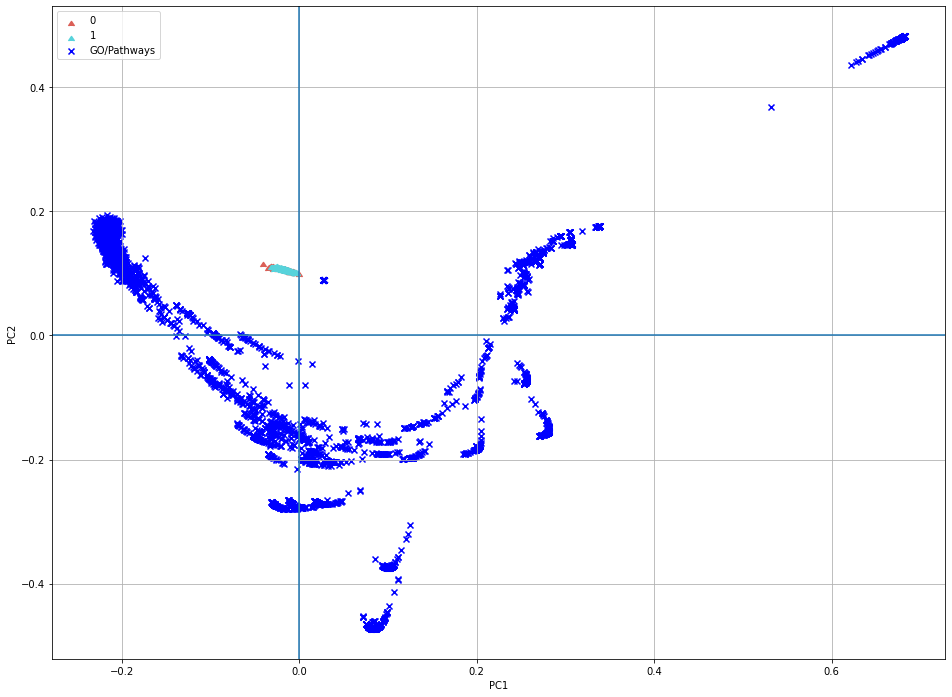

In [81]:
from utils_emb import plot_emb_projection
dist_ppt_diff = plot_emb_projection(X_ppt_diff, y=y_ppt_tr, return_dist=True, ker=tanimoto_v2)

In [82]:
dist_gos = list(dist_ppt_diff.mean().sort_values(ascending=False).head(100).index)

In [89]:
dist_ppt_diff.mean() > 0.1

GO:0040017_overexp       False
GO:0051953_overexp       False
R-HSA-5358751_overexp    False
GO:0015136_overexp       False
R-HSA-1592230_overexp    False
                         ...  
GO:0044238_overexp       False
GO:0002690_overexp       False
GO:0006720_overexp       False
GO:0030279_overexp       False
MARS                      True
Length: 3740, dtype: bool

0
[]
